<a href="https://colab.research.google.com/github/yashv22/Intro-to-ML-and-DL/blob/assignment2/assignment2solns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Question 1


In [10]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X, y):
        # Add bias term to the feature matrix
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # Initialize weights
        self.weights = np.zeros(X.shape[1])

        # Perform gradient descent
        for _ in range(self.epochs):
            # Calculate predicted values
            y_pred = np.dot(X, self.weights)

            # Calculate error
            error = y_pred - y

            # Calculate gradients
            gradients = 2 * np.dot(X.T, error) / X.shape[0]

            if self.penalty == "L1":
                # Calculate L1 regularization term
                l1_term = self.alpha * np.sign(self.weights)
                gradients += l1_term

            elif self.penalty == "L2":
                # Calculate L2 regularization term
                l2_term = 2 * self.alpha * self.weights
                gradients += l2_term

            # Update weights
            self.weights -= self.learning_rate * gradients

    def predict(self, X):
        # Add bias term to the feature matrix
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # Predict the output
        y_pred = np.dot(X, self.weights)
        return y_pred


In [24]:
# Question 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


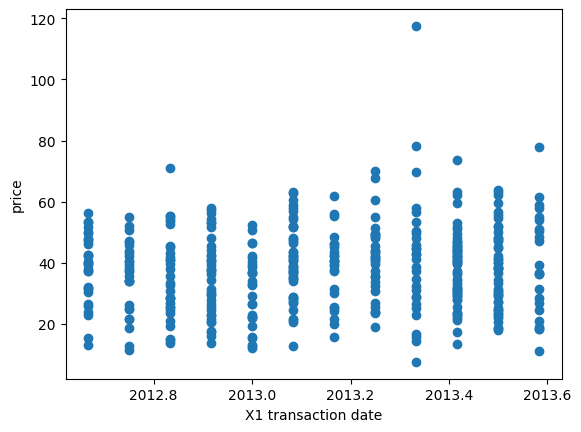

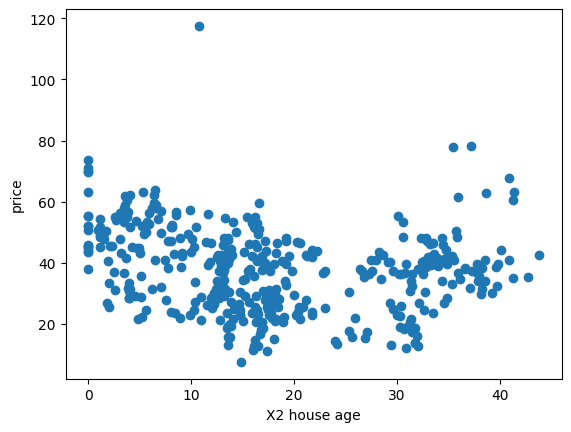

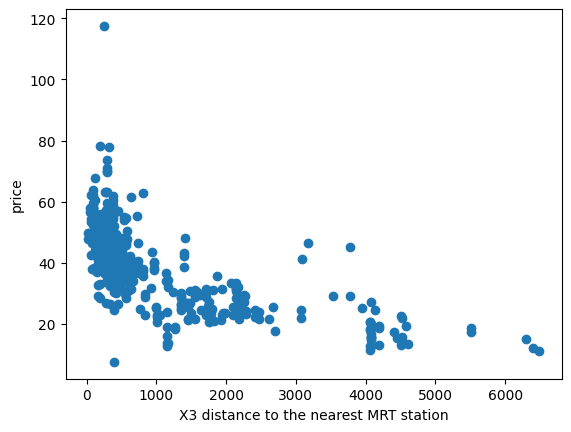

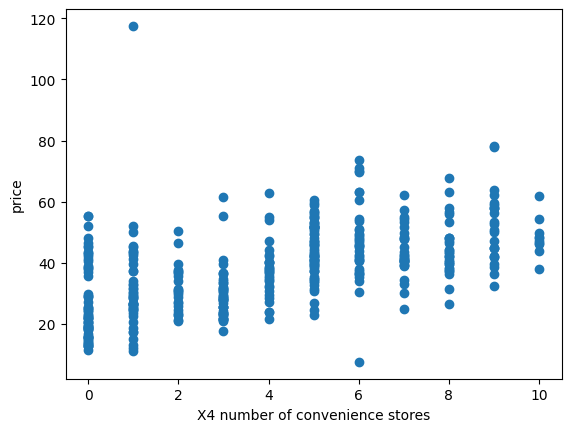

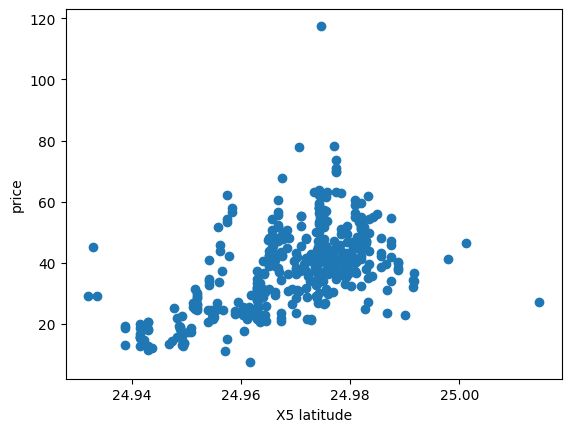

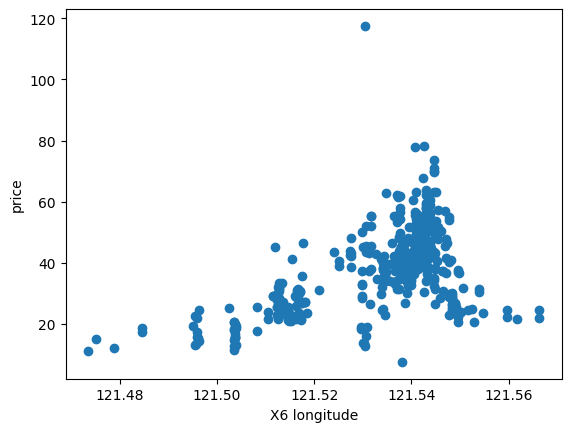

Linear Regression:
MSE: 66.6733627183596
R2 Score: 0.579662418286177

Lasso Regression:
MSE: 66.24593651248999
R2 Score: 0.582357097096593

Ridge Regression:
MSE: 65.41303409820154
R2 Score: 0.5876080724839378


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')
path = ('/content/Real estate.csv')
df = pd.read_csv(path)


# Check for null values
df.isnull().sum()

# Plotting each column against the target variable

X_cols = df.columns[1:-1]
y_col = df.columns[-1]
for cols in X_cols:
    plt.scatter(df[cols], df[y_col])
    plt.xlabel(cols)
    plt.ylabel('price')
    plt.show()

# Remove unwanted columns
df = df.drop(['No'], axis=1)

# Split the data into train and test sets
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use the models created in Question 1
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed

# Fit the training data into the models
linear_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Predict the testing data
linear_pred = linear_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)
ridge_pred = ridge_model.predict(X_test_scaled)

# Calculate MSE for each model
linear_mse = mean_squared_error(y_test, linear_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Calculate R2 score for each model
linear_r2 = r2_score(y_test, linear_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Print the MSE and R2 scores
print("Linear Regression:")
print("MSE:", linear_mse)
print("R2 Score:", linear_r2)

print("\nLasso Regression:")
print("MSE:", lasso_mse)
print("R2 Score:", lasso_r2)

print("\nRidge Regression:")
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)


In [ ]:
# Question 3

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            if self.penalty == 'l1':
                dw = np.dot(X.T, (sigmoid(linear_model) - y)) / n_samples + (self.alpha / n_samples)
            elif self.penalty == 'l2':
                dw = np.dot(X.T, (sigmoid(linear_model) - y)) / n_samples + (2 * self.alpha * self.weights / n_samples)
            else:
                dw = np.dot(X.T, (sigmoid(linear_model) - y)) / n_samples
            db = np.sum(sigmoid(linear_model) - y) / n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        y_pred_cls = [1 if pred > 0.5 else 0 for pred in y_pred]
        return y_pred_cls


# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the X data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Fit your model on the dataset and make predictions
your_logistic_regression = LogisticRegression(learning_rate=0.01, epochs=100)
your_logistic_regression.fit(X_train, y_train)
your_predictions = your_logistic_regression.predict(X_test)

# Compare with Sklearn Logistic Regression model for different penalties
penalties = ['l1', 'l2']
for penalty in penalties:
    # Create and fit Sklearn Logistic Regression model
    if penalty == 'l1':
        sklearn_logistic_regression = SklearnLogisticRegression(penalty=penalty, solver='liblinear')
    else:
        sklearn_logistic_regression = SklearnLogisticRegression(penalty=penalty)
    sklearn_logistic_regression.fit(X_train, y_train)
    
    # Make predictions using Sklearn model
    sklearn_predictions = sklearn_logistic_regression.predict(X_test)
    
    # Calculate accuracy scores
    your_accuracy = accuracy_score(y_test, your_predictions)
    sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
    
    # Print accuracy scores
    print(f'Penalty: {penalty}')
    print(f'Your Logistic Regression accuracy: {your_accuracy:.4f}')
    print(f'Sklearn Logistic Regression accuracy: {sklearn_accuracy:.4f}')
    print('---')

    # Print classification report
    print(f'Classification Report (Your Logistic Regression):')
    print(classification_report(y_test, your_predictions))
    print(f'Classification Report (Sklearn Logistic Regression):')
    print(classification_report(y_test, sklearn_predictions))
    print('---')

    # Print confusion matrix
    print(f'Confusion Matrix (Your Logistic Regression):')
    print(confusion_matrix(y_test, your_predictions))
    print(f'Confusion Matrix (Sklearn Logistic Regression):')
    print(confusion_matrix(y_test, sklearn_predictions))
    print('---')


Penalty: l1
Your Logistic Regression accuracy: 0.7105
Sklearn Logistic Regression accuracy: 0.9561
---
Classification Report (Your Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        43
           1       0.68      1.00      0.81        71

    accuracy                           0.71       114
   macro avg       0.84      0.62      0.59       114
weighted avg       0.80      0.71      0.65       114

Classification Report (Sklearn Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

---
Confusion Matrix (Your Logistic Regression):
[[10 33]
 [ 0 71]]
Confusion Matrix (Sklearn Logistic Regression):
[[40  3]
 [ 2 69]]
---
P

In [ ]:
# Question 4

KNN Accuracy: 0.7441860465116279
Sklearn KNN Accuracy: 0.7441860465116279
Decision Tree Accuracy (Max Depth=5): 0.7441860465116279


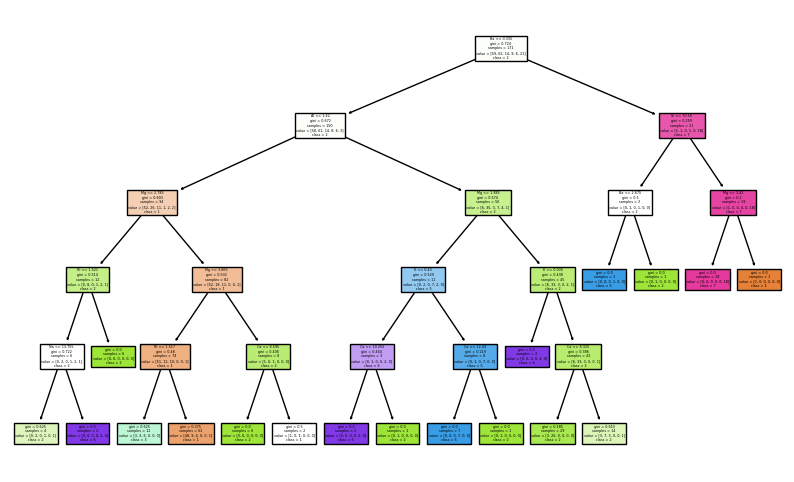

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the data
path = ('/content/glass.csv')
data = pd.read_csv(path)



# Extract the X and Y columns
X = data.drop('Type', axis=1)
Y = data['Type']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print('KNN Accuracy: ' + str(knn_accuracy))

# Compare with the sklearn KNN model
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
sklearn_knn_predictions = sklearn_knn.predict(X_test)
sklearn_knn_accuracy = accuracy_score(y_test, sklearn_knn_predictions)
print('Sklearn KNN Accuracy: ' + str(sklearn_knn_accuracy))

# Implement a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print('Decision Tree Accuracy (Max Depth=5): ' + str(decision_tree_accuracy))

# Plot the Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=decision_tree.classes_.astype(str), filled=True)
# tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=label_encoder.classes_.astype(str))
plt.show()
